In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [2]:
#Read input file and understand the data
# "default" is my dependent variable

### Answer

In [3]:
credit_df = pd.read_csv("german_credit.csv")

print('Data Dimension:')
print(credit_df.shape)

Data Dimension:
(1000, 21)


In [4]:
credit_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
# Lets build a Ensemble model but need to modify the dataset first
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

### Answer

In [6]:
# Print Shape of model data
credit_df.shape

(1000, 21)

In [7]:
# Print unique value of all categorical feature and see
for col in credit_df.select_dtypes(include='object').columns:
    print("Unique value of : {}".format(col))
    print(credit_df[col].unique())
    print("\n")

Unique value of : account_check_status
['< 0 DM' '0 <= ... < 200 DM' 'no checking account'
 '>= 200 DM / salary assignments for at least 1 year']


Unique value of : credit_history
['critical account/ other credits existing (not at this bank)'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'no credits taken/ all credits paid back duly'
 'all credits at this bank paid back duly']


Unique value of : purpose
['domestic appliances' '(vacation - does not exist?)' 'radio/television'
 'car (new)' 'car (used)' 'business' 'repairs' 'education'
 'furniture/equipment' 'retraining']


Unique value of : savings
['unknown/ no savings account' '... < 100 DM' '500 <= ... < 1000 DM '
 '.. >= 1000 DM ' '100 <= ... < 500 DM']


Unique value of : present_emp_since
['.. >= 7 years' '1 <= ... < 4 years' '4 <= ... < 7 years' 'unemployed'
 '... < 1 year ']


Unique value of : personal_status_sex
['male : single' 'female : divorced/separated/married'
 'male : divorced/separate

In [8]:
# Missing value
credit_df.isna().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

In [9]:
# Missing value
credit_df.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

#### Creating dummuy variable by converting all categorial variable.

In [10]:
cat_var = credit_df.select_dtypes(include='object').columns
cat_var

Index(['account_check_status', 'credit_history', 'purpose', 'savings',
       'present_emp_since', 'personal_status_sex', 'other_debtors', 'property',
       'other_installment_plans', 'housing', 'job', 'telephone',
       'foreign_worker'],
      dtype='object')

In [11]:
dummy_df = pd.get_dummies(credit_df,columns=cat_var)

In [12]:
dummy_df = pd.DataFrame(dummy_df)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
default                                                                       1000 non-null int64
duration_in_month                                                             1000 non-null int64
credit_amount                                                                 1000 non-null int64
installment_as_income_perc                                                    1000 non-null int64
present_res_since                                                             1000 non-null int64
age                                                                           1000 non-null int64
credits_this_bank                                                             1000 non-null int64
people_under_maintenance                                                      1000 non-null int64
account_check_status_0 <= ... < 200 DM                                        1000 non-null uint8
account_chec

In [13]:
dummy_df.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

### Answer

#### print correlation matrix and plot heatmap of correleation matrix

In [13]:
# Print correlation matrix
corr = dummy_df.corr()
corr

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


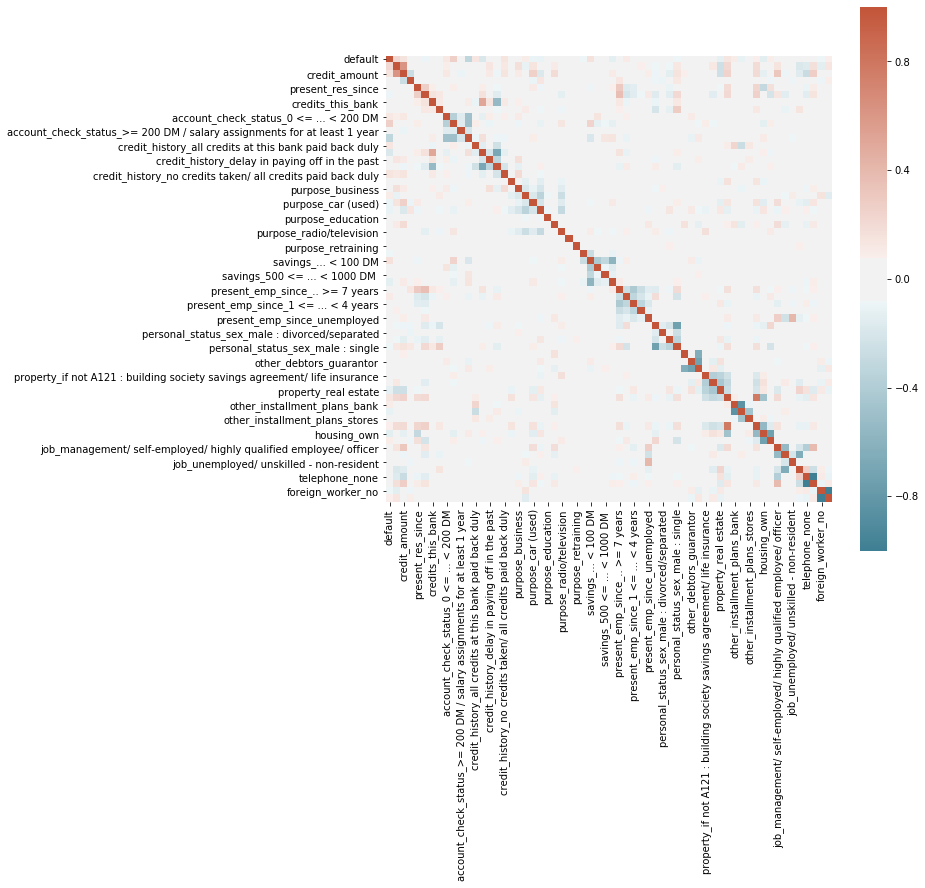

In [14]:
# Plot heat map of correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(corr,vmin=-1, vmax=1, center=0,cmap=cmap,square=True, ax=ax)

### Drop the original variables which are converted to dummy

### Answer
#### Here pd.get_dummies() function is used to create all dummy variable. This function will also drop original variable after converting to dummy.

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

### Answer

In [15]:
X =  dummy_df.drop(["default"],axis=1)
Y = dummy_df["default"]

In [16]:
from sklearn.model_selection import train_test_split
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

### Answer

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf_classifier = RandomForestClassifier(n_estimators=500, n_jobs=2,criterion="entropy",random_state=9999,max_depth=10)
rf_classifier.fit(X_train, y_train)
test_pred = rf_classifier.predict(X_test)

In [19]:
training_score = rf_classifier.score(X_test,y_test)
print(training_score)

0.75


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

### Answer

In [20]:
from sklearn import metrics

In [21]:
print("Confusion matrix:")
metrics.confusion_matrix(y_test, test_pred)

Confusion matrix:


array([[201,  13],
       [ 62,  24]], dtype=int64)

In [22]:
print("Accuracy_Score:")
metrics.accuracy_score(y_test,test_pred)

Accuracy_Score:


0.75

In [23]:
print("Classification Report")
print(metrics.classification_report(y_test, test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       214
           1       0.65      0.28      0.39        86

    accuracy                           0.75       300
   macro avg       0.71      0.61      0.62       300
weighted avg       0.73      0.75      0.71       300



### Q6 Show the list of the features importance( 1 Marks)

### Answer

In [24]:
print("Feature Importance:")
FeatureImportance = pd.DataFrame(rf_classifier.feature_importances_,columns=['Column'],index=X_train.columns)
FeatureImportance

Feature Importance:


,Column
duration_in_month,0.075507
credit_amount,0.096586
installment_as_income_perc,0.035234
present_res_since,0.027920
age,0.071437
credits_this_bank,0.018789
people_under_maintenance,0.009222
account_check_status_0 <= ... < 200 DM,0.016642
account_check_status_< 0 DM,0.037174
account_check_status_>= 200 DM / salary assignments for at least 1 year,0.006757


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

### Answer

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [26]:
# Use below values
num_folds = 10
seed = 77

In [27]:
#Validate the Random Forest model build above using k fold

In [28]:
Kfold_10 = KFold(n_splits=num_folds,random_state=seed)
rf_kfold_10 = cross_val_score(rf_classifier, X_train, y_train, scoring='r2', cv=Kfold_10)

In [29]:
#Calculate Mean score

In [30]:
# Calculate score standard deviation using std()

In [31]:
print("Mean :{}".format(rf_kfold_10.mean()))
print("Standard Deviation :{}".format(rf_kfold_10.std()))

Mean :-0.1624879298574081
Standard Deviation :0.20168434285054085


In [32]:
# Use below values
num_folds = 20
seed = 77

In [33]:
Kfold_20 = KFold(n_splits=num_folds,random_state=seed)
rf_kfold_20 = cross_val_score(rf_classifier, X_train, y_train, scoring='r2', cv=Kfold_20)

In [34]:
print("Mean :{}".format(rf_kfold_20.mean()))
print("Standard Deviation :{}".format(rf_kfold_20.std()))

Mean :-0.15176221834529452
Standard Deviation :0.28874119426611344


Mean is more in case of kfold=10 than kfold=20 but standard deviation is less in Kfold = 10 case. Difference between means of both model is not significant, hence we can select model with less standard deviation.
Here difference is not much but still we can say that kfold=10 is better option. "rf_kfold_10" is better model that "rf_kfold_20"

# Q8 Print the confusion matrix( 1 Marks)

### Answer

#### Build final Random forest classifier with kold=10
Mean is more in case of kfold=10 than kfold=20 but standard deviation is less in Kfold = 10 case. Difference between means of both model is not significant, hence we can select model with less standard deviation. Here difference is not much but still we can say that kfold=10 is better option. "rf_kfold_10" is better model that "rf_kfold_20"

In [35]:
from sklearn.model_selection import StratifiedKFold

In [36]:
cv = StratifiedKFold(n_splits=10, random_state=9999, shuffle=True)
for (train, test), i in zip(cv.split(X, Y), range(5)):
    rf_classifier.fit(X.iloc[train], Y.iloc[train])
    pred = rf_classifier.predict(X.iloc[test])

In [37]:
print("Confusion Matrix")
metrics.confusion_matrix(Y.iloc[test], pred)

Confusion Matrix


array([[63,  7],
       [21,  9]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

### Answer

In [38]:
print("Classification Report:")
print(metrics.classification_report(Y.iloc[test], pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        70
           1       0.56      0.30      0.39        30

    accuracy                           0.72       100
   macro avg       0.66      0.60      0.60       100
weighted avg       0.69      0.72      0.69       100



In [39]:
print("Percentage of correct prediction for default {}".format(metrics.accuracy_score(Y.iloc[test], pred)))

Percentage of correct prediction for default 0.72


In [40]:
print("Precision score for default {}".format(metrics.precision_score(Y.iloc[test], pred)))

Precision score for default 0.5625


In [41]:
print("Recall score for default {}".format(metrics.recall_score(Y.iloc[test], pred)))

Recall score for default 0.3


[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

### Answer

In [42]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [43]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rf_classifier.fit(X_, y_)
    y_pred = rf_classifier.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [44]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7476666666666667
Standard deviation:  0.014456832294800956
